In [1]:
pip install python.binance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#CHARGEMENT DES DONNNEE

In [4]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# -- Define Binance Client --
client = Client()

# -- You can change the crypto pair ,the start date and the time interval below --
pairName = "BTCUSDT"
startDate = "01 january 2017"
timeInterval = Client.KLINE_INTERVAL_1HOUR

# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate)

# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Data loaded 100%


In [66]:
# INDICATEUR

In [6]:
# -- Drop all columns we do not need --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)

# -- Indicators, you can edit every value --µ
df['EMA200'] = ta.trend.ema_indicator(close=df['close'], window=200)
# -- Trix Indicator --
trixLength = 9
trixSignal = 21
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']

# -- Stochasitc RSI --
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3)

print("Indicators loaded 100%")

# -- Uncomment the line below if you want to check your dataset with indicators --
df.head(50)

Indicators loaded 100%


C:\Users\podoG\AppData\Local\Temp\ipykernel_14048\3964137434.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


,open,high,low,close,volume,EMA200,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.18100900,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.23491600,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.22969100,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.44324900,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.97280700,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 09:00:00,4360.00,4445.78,4360.00,4444.00,10.76362300,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 10:00:00,4441.10,4470.00,4399.81,4460.00,24.86539900,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 11:00:00,4460.00,4485.39,4427.30,4427.30,27.01805300,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 12:00:00,4436.06,4449.56,4411.00,4411.00,23.03239800,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# RUN dans la collect de donnée

In [8]:

dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
#dfTest = df['2023-01-20':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.000
takerFee = 0.000

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < 0.82:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row, previousRow):
    if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > 0.20:
        return True
    else:
        return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
   # stopLoss = buyPrice - 0.2 * buyPrice
   # takeProfit = buyPrice + 0.15 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
 

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

C:\Users\podoG\AppData\Local\Temp\ipykernel_14048\535999034.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\podoG\AppData\Local\Temp\ipykernel_14048\535999034.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\podoG\AppData\Local\Temp\ipykernel_14048\535999034.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\podoG\AppData\Local\Temp\ipykernel_14048\535999034.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\podoG\AppData\Local\Tem

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-08-19 13:00:00,2017-08-19 13:00:00,Buy,Buy Market Order,4039.84,0.0,0,0.247535,1000.000000,0.000000,NaN,NaN,
2017-08-20 15:00:00,2017-08-20 15:00:00,Sell,Sell Market Order,4125.00,0.0,1021.080043,0.000000,1021.080043,0.000000,21.080043,2.108004,Good
2017-08-21 23:00:00,2017-08-21 23:00:00,Buy,Buy Market Order,4016.00,0.0,0,0.254253,1021.080043,0.000000,NaN,NaN,
2017-08-22 02:00:00,2017-08-22 02:00:00,Sell,Sell Market Order,3849.98,0.0,978.86896,0.000000,978.868960,-0.041340,-42.211083,-4.133964,Bad
2017-08-22 14:00:00,2017-08-22 14:00:00,Buy,Buy Market Order,3849.00,0.0,0,0.254318,978.868960,-0.041340,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-18 03:00:00,2023-03-18 03:00:00,Sell,Sell Market Order,27307.54,0.0,196040.218117,0.000000,196040.218117,-0.430822,-2297.057464,-1.158157,Bad
2023-03-19 20:00:00,2023-03-19 20:00:00,Buy,Buy Market Order,27889.22,0.0,0,7.029247,196040.218117,-0.430822,NaN,NaN,
2023-03-20 06:00:00,2023-03-20 06:00:00,Sell,Sell Market Order,27628.50,0.0,194207.55282,0.000000,194207.552820,-0.436143,-1832.665297,-0.934841,Bad


In [23]:
# ANalyse

In [9]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")
diff = dfTest.index[len(dfTest)-1] - dfTest.index[0]
jours = diff.days
print("nombre de trade par jours potentiel :", totalTrades/jours)
      
print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : BTCUSDT
Period : [2017-08-17 04:00:00] -> [2023-03-22 12:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 194663.25 $
Performance vs US Dollar : 19366.33 %
Buy and Hold Performence : 555.01 %
Performance vs Buy and Hold : 3389.35 %
Best trade : +24.33 %, the 2019-10-26 21:00:00
Worst trade : -16.25 %, the 2021-12-04 08:00:00
Worst drawBack : -55.00000000000001 %
Total fees :  0.0 $

----- Trades Informations -----
Total trades on period : 1272
Number of positive trades : 636
Number of negative trades :  636
Trades win rate ratio : 50.0 %
Average trades performance : 0.48 %
Average positive trades : 2.76 %
Average negative trades : -1.79 %
nombre de trade par jours potentiel : 0.6226138032305433

----- Trades Reasons -----
Buy Market Order number : 1272
Sell Market Order number : 1272



----- Plot -----


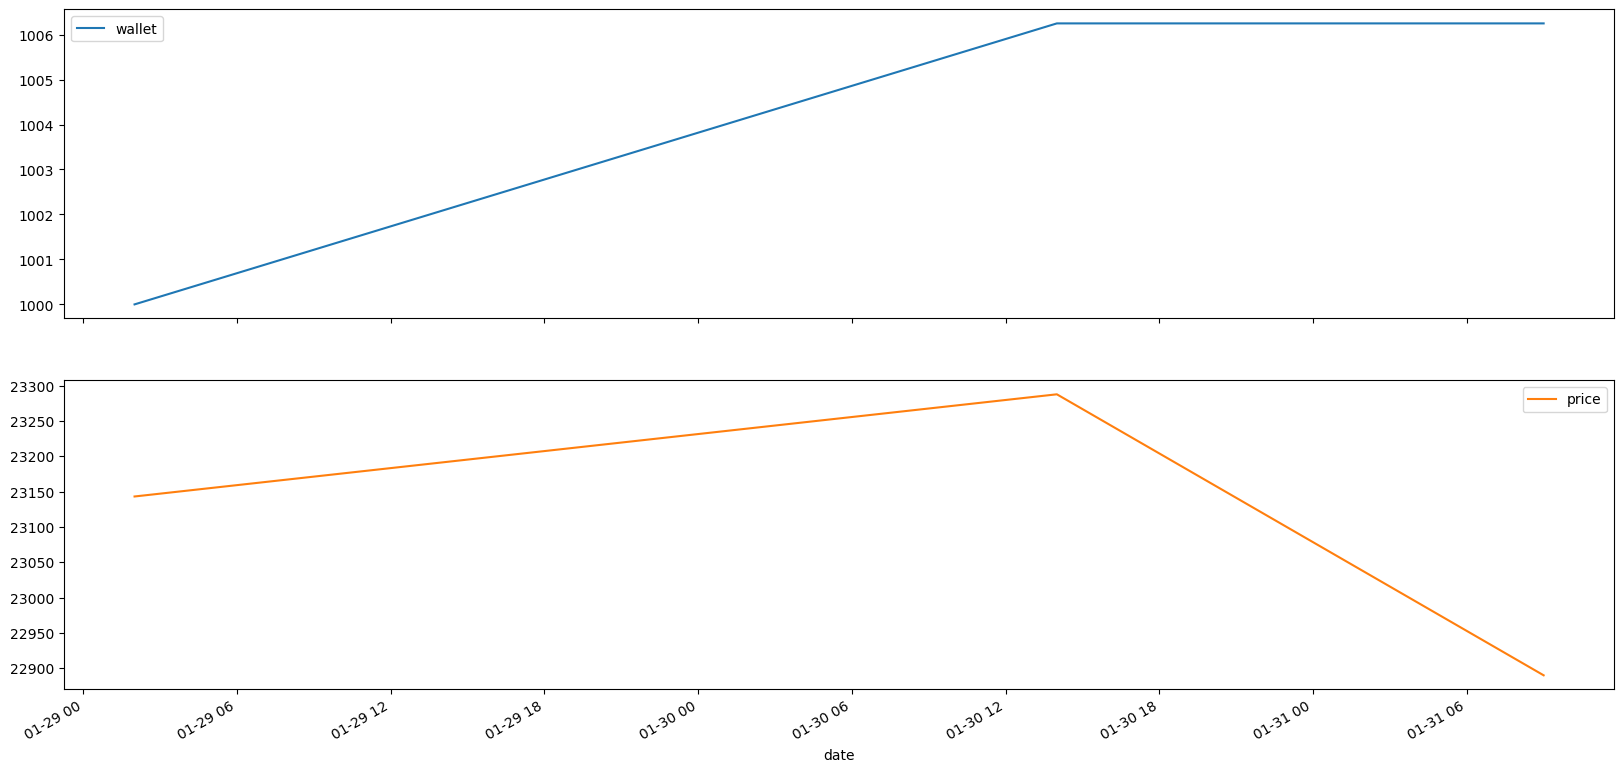

In [10]:

dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")

In [84]:
dt.tail(50)

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2022-12-12 15:00:00,2022-12-12 15:00:00,Buy,Buy Market Order,1249.35,3110.206006,0,3553.881003,4.440041e+06,-0.474547,NaN,NaN,
2022-12-14 05:00:00,2022-12-14 05:00:00,Sell,Sell Market Order,1320.88,3285.975238,4690964.364425,0.000000,4.690964e+06,-0.444852,250923.132930,5.651369,Good
2022-12-15 20:00:00,2022-12-15 20:00:00,Buy,Buy Market Order,1271.32,3283.675055,0,3687.254735,4.687681e+06,-0.445240,NaN,NaN,
2022-12-16 14:00:00,2022-12-16 14:00:00,Sell,Sell Market Order,1214.56,3134.874477,4475257.236148,0.000000,4.475257e+06,-0.470379,-212423.453221,-4.531526,Bad
2022-12-17 09:00:00,2022-12-17 09:00:00,Buy,Buy Market Order,1176.77,3132.680065,0,3800.338686,4.472125e+06,-0.470750,NaN,NaN,
2022-12-18 16:00:00,2022-12-18 16:00:00,Sell,Sell Market Order,1177.62,3132.748391,4472222.095576,0.000000,4.472222e+06,-0.470739,97.539493,0.002181,Good
2022-12-19 02:00:00,2022-12-19 02:00:00,Buy,Buy Market Order,1183.77,3130.555467,0,3775.303936,4.469092e+06,-0.471109,NaN,NaN,
2022-12-19 20:00:00,2022-12-19 20:00:00,Sell,Sell Market Order,1176.26,3108.517305,4437630.490246,0.000000,4.437630e+06,-0.474832,-31461.049863,-0.703970,Bad
2022-12-20 13:00:00,2022-12-20 13:00:00,Buy,Buy Market Order,1210.65,3106.341343,0,3662.928302,4.434524e+06,-0.475200,NaN,NaN,


In [19]:
dt['tradeIs']

date
2017-11-08 01:00:00        
2017-11-08 14:00:00    Good
2017-11-09 06:00:00        
2017-11-09 08:00:00     Bad
2017-11-09 17:00:00        
                       ... 
2023-01-15 16:00:00        
2023-01-16 17:00:00     Bad
2023-01-17 04:00:00        
2023-01-18 01:00:00    Good
2023-01-19 11:00:00        
Name: tradeIs, Length: 2353, dtype: object

In [7]:
dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-08-19 13:00:00,2017-08-19 13:00:00,Buy,Buy Market Order,4039.84,0.0,0,0.247535,1000.000000,0.000000,NaN,NaN,
2017-08-20 15:00:00,2017-08-20 15:00:00,Sell,Sell Market Order,4125.00,0.0,1021.080043,0.000000,1021.080043,0.000000,21.080043,2.108004,Good
2017-08-22 00:00:00,2017-08-22 00:00:00,Buy,Buy Market Order,3790.00,0.0,0,0.269414,1021.080043,0.000000,NaN,NaN,
2017-08-22 02:00:00,2017-08-22 02:00:00,Sell,Sell Market Order,3849.98,0.0,1037.23951,0.000000,1037.239510,0.000000,16.159467,1.582586,Good
2017-08-22 19:00:00,2017-08-22 19:00:00,Buy,Buy Market Order,3984.24,0.0,0,0.260336,1037.239510,0.000000,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 07:00:00,2023-01-23 07:00:00,Buy,Buy Market Order,22695.90,0.0,0,7.298029,165635.344341,-0.498452,NaN,NaN,
2023-01-24 11:00:00,2023-01-24 11:00:00,Sell,Sell Market Order,22917.66,0.0,167253.75533,0.000000,167253.755330,-0.493552,1618.410989,0.977093,Good
2023-01-25 17:00:00,2023-01-25 17:00:00,Buy,Buy Market Order,22568.94,0.0,0,7.410794,167253.755330,-0.493552,NaN,NaN,


In [8]:
dt['fiat']=dt['fiat'].replace(0,1)
dt['resultat%']=dt['resultat']/dt['fiat']*100
dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-08-19 13:00:00,2017-08-19 13:00:00,Buy,Buy Market Order,4039.84,0.0,1.000000,0.247535,1000.000000,0.000000,NaN,NaN,
2017-08-20 15:00:00,2017-08-20 15:00:00,Sell,Sell Market Order,4125.00,0.0,1021.080043,0.000000,1021.080043,0.000000,21.080043,2.064485,Good
2017-08-22 00:00:00,2017-08-22 00:00:00,Buy,Buy Market Order,3790.00,0.0,1.000000,0.269414,1021.080043,0.000000,NaN,NaN,
2017-08-22 02:00:00,2017-08-22 02:00:00,Sell,Sell Market Order,3849.98,0.0,1037.239510,0.000000,1037.239510,0.000000,16.159467,1.557930,Good
2017-08-22 19:00:00,2017-08-22 19:00:00,Buy,Buy Market Order,3984.24,0.0,1.000000,0.260336,1037.239510,0.000000,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 07:00:00,2023-01-23 07:00:00,Buy,Buy Market Order,22695.90,0.0,1.000000,7.298029,165635.344341,-0.498452,NaN,NaN,
2023-01-24 11:00:00,2023-01-24 11:00:00,Sell,Sell Market Order,22917.66,0.0,167253.755330,0.000000,167253.755330,-0.493552,1618.410989,0.967638,Good
2023-01-25 17:00:00,2023-01-25 17:00:00,Buy,Buy Market Order,22568.94,0.0,1.000000,7.410794,167253.755330,-0.493552,NaN,NaN,


<AxesSubplot:xlabel='Date', ylabel='% of good trades'>

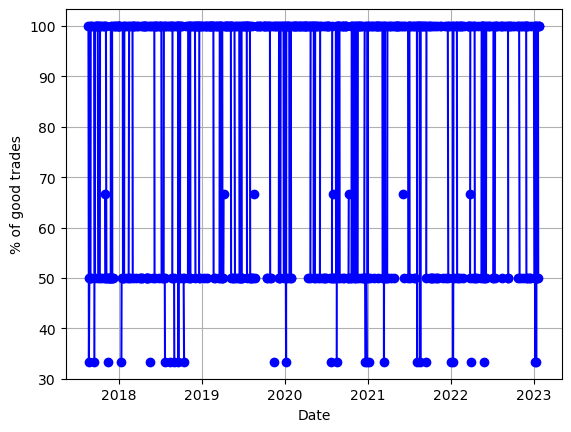

In [9]:
good_trades = dt[dt['resultat%']>0]

# Compter le nombre de transactions "bonnes" par jour
good_counts = good_trades.groupby(good_trades['date'].dt.date).size()

# Compter le nombre total de transactions par jour
total_counts = dt.groupby(dt['date'].dt.date).size()

# Calculer le pourcentage de transactions "bonnes" par jour
good_pct = good_counts / total_counts * 100

# Afficher la visualisation en utilisant seaborn
good_pct.plot(kind='line',xlabel='Date',ylabel='% of good trades',marker='o',color='b',grid=True)

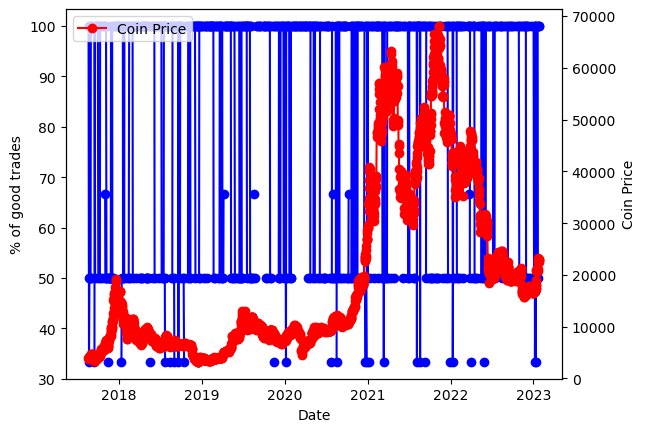

In [10]:
fig, ax1 = plt.subplots()

ax1.plot(good_pct.index, good_pct.values, marker='o', color='b', label='% of good trades')
ax1.set_ylabel('% of good trades')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()
ax2.plot(dt['date'], dt['price'], marker='o', color='r', label='Coin Price')
ax2.set_ylabel('Coin Price')

plt.legend()

In [11]:
# Create a new column 'good_trade' with value 1 if resultat% is positive else 0
dt['good_trade'] = np.where(dt['resultat%']>0,1,0)
dt['date']=pd.to_numeric(dt['date'])
# Groupby date and calculate the sum of 'good_trade' and total trade
good_trade_count = dt.groupby(dt['date'].dt.date)['good_trade'].sum()
bad_trade_count = dt.groupby(dt['date'].dt.date).size() - good_trade_count

# Create a histplot with good trade count and bad trade count
sns.histplot(data=[good_trade_count, bad_trade_count], element='step', stat='density',x='date')
plt.xlabel('Date')
plt.ylabel('Trade Count')
plt.legend(['Good Trades', 'Bad Trades'])
plt.show()



AttributeError: Can only use .dt accessor with datetimelike values

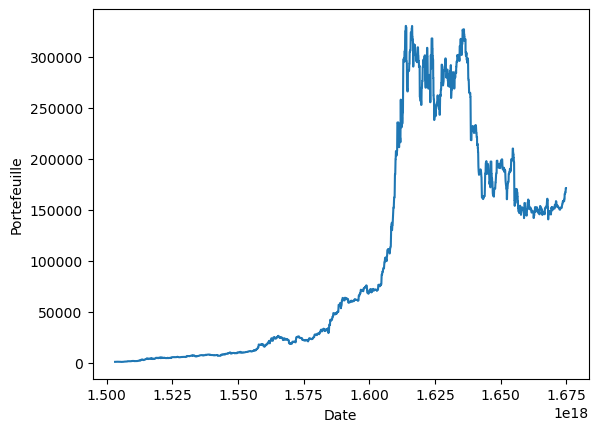

In [12]:
sns.lineplot(x=dt['date'], y=dt['wallet'])
plt.xlabel('Date')
plt.ylabel('Portefeuille')
plt.show()

In [ ]:
Pair Symbol : BNBUSDT
Period : [2017-11-06 03:00:00] -> [2023-01-21 06:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 2504885.55 $
Performance vs US Dollar : 250388.55 %
Buy and Hold Performence : 17723.53 %
Performance vs Buy and Hold : 1312.75 %
Best trade : +79.96 %, the 2018-01-05 22:00:00
Worst trade : -3.84 %, the 2018-07-30 18:00:00
Worst drawBack : -41.0 %
Total fees :  1350000.49 $

----- Trades Informations -----
Total trades on period : 1057
Number of positive trades : 610
Number of negative trades :  447
Trades win rate ratio : 57.71 %
Average trades performance : 1.91 %
Average positive trades : 4.14 %
Average negative trades : -1.14 %